<h1><center>Shopify Technical Challenge Summer 2022</center></h1>
<h2><center>By: Janice Xu :) </center></h2>

<h2>Question 1 </h2>
Before jumping into hypothesizing conclusions, we must first look at the data we have.

<h3>Importing Libraries and Data</h3>

In [5]:
import pandas as pd
import seaborn as sns

In [7]:
# Importing data
df = pd.read_csv('/Users/janicexu/shopdataset.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [12]:
# Descriptive statistics based on order amount 
round(df[['order_amount']].describe(),2)

,order_amount
count,5000.00
mean,3145.13
std,41282.54
min,90.00
25%,163.00
50%,284.00
75%,390.00
max,704000.00


When looking at the central tendencies available here, it looks like the mean, also known as the Average Order Value (AOV) is a lot higher than the other statistics. Given that we know sneakers are a relatively affordable item, it's safe to assume the real AOV would gravitate toward the median value of 284 rather than 3,145. The large AOV value indicates that the distribution of data is left skewed, thus we must look at the values in the upper range.

<h3>Summary of Findings </h3>
<li>The data includes outliers in the higher range that strongly affected mean</li>
<li>The high standard deviation also indicates there is high variability</li>

<h2>1a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. </h2>

<h3>1. Removing Outliers</h3>

By first glance, it seems like there are 2 types of anomalies
<ol>
  <li>Wholesalers: Those who have bulk orders where they purchase multiple shoes in one order </li>
  <li>Exepnsive Shoe Shops: Brands that may have luxury, or designer shoes with higher order amounts for a single quantity</li>
</ol>

To do so, I will create 2 copies of the data frame to conduct separate analysis.

In [ ]:
# Copying data frames


<h3>1a. Wholesalers</h3>

In [25]:
counter = df.groupby(['total_items']).size().to_frame('count').sort_values(['total_items'], ascending =[False])
counter.head(6)

,count
total_items,
2000,17
8,1
6,9
5,77
4,293
3,941


<h3>1a. Identifying The Shop </h3>

In [37]:
# Observing which shop contributes to the highest total items
df[df.total_items == 2000].shop_id.unique()

array([42])

Shop 42 looks like the contributor of 2000 total items per order. However, we must also look at the transactions associated with the shop to draw further conclusions

<h3>1a. Identifying The User </h3>

In [44]:
# Identifying the orders with 2000 total items and sorting them
df[(df.total_items==2000)].sort_values(['created_at'], ascending = [False]).head(10)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00


When sorted by date created, we can see that there are some orders created at the exact same time up (including the minutes and seconds), as well as by the same user. An assumption that could be made is that there may have been 1) multiple orders placed through an automated system or 2) the orders were duplicated. However, the order id is distinct so we will go with the first assumption.

In [42]:
df[df['shop_id']==42].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58


Other transactions from the store are not all bulk sales. Although this is the case, we will remove the entire shop as we cannot control where consumers buy in bulk.

<h3>1b. Expensive Shoe Shops</h3>

In [46]:
# Counting how many times the highest order amounts were placed 
counter = df.groupby(['order_amount']).size().to_frame('count').sort_values(['order_amount'], ascending =[False])
counter.head(6)

,count
order_amount,
704000,17
154350,1
102900,1
77175,9
51450,16
25725,19


We know from previous analysis that the highest order amount was from a single shop with multiple bulk orders. However, It looks like there is a high order amount with a single item. Therefore, there may be shops with high prices that are influencing the AOV. We will determine this by finding the price of a single item where total_items = 1.

<h3>1b. Single Order Values</h3>

In [52]:
df['single_orders'] = df['order_amount'] / df['total_items']
df.sort_values(['single_orders'], ascending =[False]).head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,single_orders
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35,25725.0
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46,25725.0
4505,4506,78,866,25725,1,debit,2017-03-22 22:06:01,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04,25725.0


It now looks like shop 78 orders are extremely high because of the expensive price PER item. Compared to the initial median we had of $284, this single order value is astronomical! To check this further, let's compare the single order value of top shops.

In [59]:
df_group = df.groupby(['shop_id'])['single_orders'].mean().reset_index().sort_values(['single_orders'], ascending =[False])
df_group.head()

,shop_id,single_orders
77,78,25725.0
41,42,352.0
11,12,201.0
88,89,196.0
98,99,195.0


Thus, it looks like shop 78 seems to be the one shop with a very high single item price and is pushing the AOV up.

<h3>1c. Removing Outliers</h3>
As shown above, we have found reason to remove shop 78 and 42 so we can do so and recalculate our AOV.

In [9]:
fixed_AOV = df[(df.shop_id!=42) & (df.shop_id!=78)]
round(fixed_AOV['order_amount'].mean(),2)

300.16

<h3>1d. Data Visualization</h3>

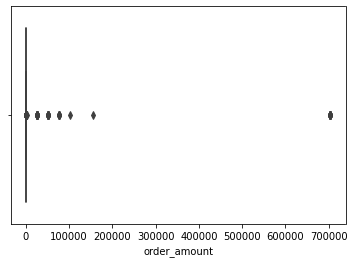

In [71]:
# Creating a boxplot of the entire data set 
ax = sns.boxplot(x=df['order_amount'])

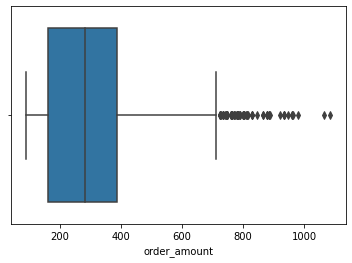

In [70]:
# Creating a boxplot with shops 42 and 78 removed
ay = sns.boxplot(x=fixed_AOV['order_amount'])

As seen above, the entire data set includes values that are way too large in comparison to the rest of the data. Once the data points that are too large are taken out, the boxplot can be seen.

<h3>1f. Final Calculation</h3>

In [11]:
round(fixed_AOV[['order_amount']].describe(),2)

,order_amount
count,4903.00
mean,300.16
std,155.94
min,90.00
25%,163.00
50%,284.00
75%,386.50
max,1086.00


It looks like the median values from the filtered dataset and original data set are the same at 284. This is expected as medians are not affected by outliers in a large dataset. This compares much more to the mean of 300. Therefore, when looking at data sets it is important to evaluate outliers as they can change mean values a great deal.

<h2>1b) What metric would you report for this dataset?</h2>

Central tendencies are great to describe a set of data by identifying its central position in the data set. Given that this data set included outliers as discussed previously, it is worthwhile to eliminate them in order to use AOV (mean). However, at initial glance, in a situation where outliers could not be removed (too expensive, too much data, etc.), we are able to look at quartiles, where median (50%) would be a sufficient metric. 

<h2>1c) What is its value?</h2>

In [13]:
df['order_amount'].median()

284.0

Therefore, the median of the original data set is 284!

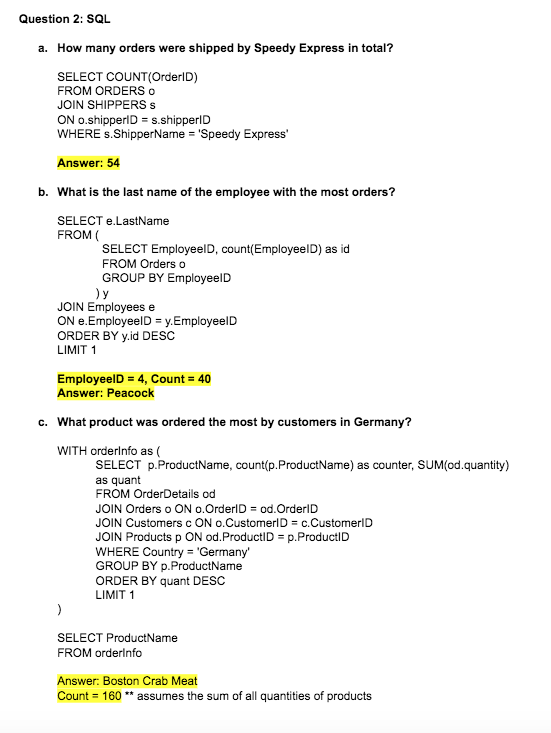

In [15]:
from IPython import display
display.Image('/Users/janicexu/q2sql.png')